# Effect of different loan attributes on Prosper's Loans Status outcomes
### by Rujeko Musarurwa

## Investigation Overview
In this investigation, I looked at different loan attributes that could affect the outcome of a loan and whether a loan would be paid back in time (completed) or be overdue. I focused mainly on monthly loan payments, original loan amount and interest rates.

## Dataset Overview
The loan dataset for Prosper is a large dataset that contains over 100k customer loans information. I looked at 12 attributes for this project that include the ones mentioned above as well as the loan term, state borrower lives in, occupation, monthly income and some others. I also removed rows with null values and those were mainly for state and occupation variables.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#load dataset
df = pd.read_csv('prosper_loan_data.csv')
df.shape

(113937, 81)

In [4]:
#create dataframe with 12 variables to be used
loan_data = df[['ListingKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'BorrowerState', 'Occupation', 
          'StatedMonthlyIncome', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount','LoanOriginationQuarter', 
          'MonthlyLoanPayment']]
loan_data= loan_data.copy()
loan_data.shape

(113937, 12)

In [5]:
#remove these rows with null values as dataset is large enough for us to remove them and additionally, state and occupation is
#data we can not fill in with mean or median values
loan_data.dropna(inplace=True)

# now check all columns don't have null values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106221 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingKey                  106221 non-null  object 
 1   Term                        106221 non-null  int64  
 2   LoanStatus                  106221 non-null  object 
 3   BorrowerAPR                 106221 non-null  float64
 4   BorrowerRate                106221 non-null  float64
 5   BorrowerState               106221 non-null  object 
 6   Occupation                  106221 non-null  object 
 7   StatedMonthlyIncome         106221 non-null  float64
 8   LoanMonthsSinceOrigination  106221 non-null  int64  
 9   LoanOriginalAmount          106221 non-null  int64  
 10  LoanOriginationQuarter      106221 non-null  object 
 11  MonthlyLoanPayment          106221 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 10.5+ MB


In [6]:
# check for values higher than 500 000
loan_data.query('StatedMonthlyIncome >500000') # two rows have values higher than 500k

#remove these values as they are extreme outliers and will affect the distribution and also make it harder to read graphs

# get index names for the two high incomes
high_income = loan_data[loan_data['StatedMonthlyIncome'] >500000].index
 
# Delete these row indexes from dataFrame
loan_data.drop(high_income , inplace=True)

In [7]:
loan_data=loan_data.reset_index()
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106219 entries, 0 to 106218
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   index                       106219 non-null  int64  
 1   ListingKey                  106219 non-null  object 
 2   Term                        106219 non-null  int64  
 3   LoanStatus                  106219 non-null  object 
 4   BorrowerAPR                 106219 non-null  float64
 5   BorrowerRate                106219 non-null  float64
 6   BorrowerState               106219 non-null  object 
 7   Occupation                  106219 non-null  object 
 8   StatedMonthlyIncome         106219 non-null  float64
 9   LoanMonthsSinceOrigination  106219 non-null  int64  
 10  LoanOriginalAmount          106219 non-null  int64  
 11  LoanOriginationQuarter      106219 non-null  object 
 12  MonthlyLoanPayment          106219 non-null  float64
dtypes: float64(4),

## Distribution of loan status

Current loans are by and large of the highest frequency followed by completed loans- Frequency of Chargedoff loans is relatively high.

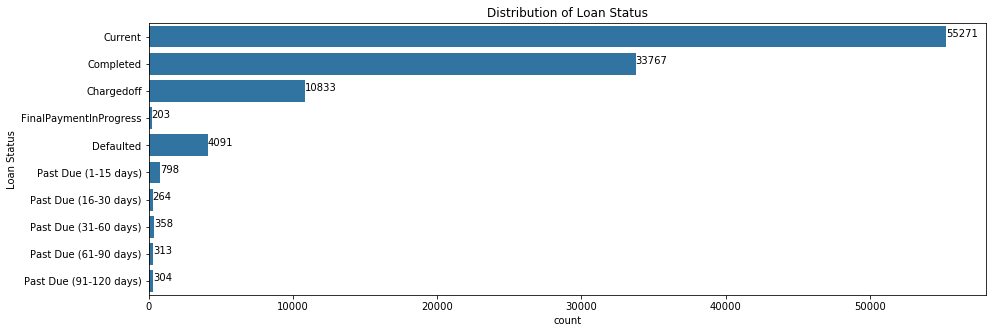

In [8]:
plt.figure(figsize=(15,5))

#order the category differently to the way it is in the dataframe so the past due days are ordered
level_order = ['Current', 'Completed', 'Chargedoff','FinalPaymentInProgress','Defaulted','Past Due (1-15 days)',
               'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
loan_data['LoanStatus'] = loan_data['LoanStatus'].astype(ordered_cat)

# plot the graph and set the bars to one colour
base_color = sb.color_palette()[0]
l_plot = sb.countplot(data = loan_data, y = 'LoanStatus', color = base_color)
plt.ylabel('Loan Status')
plt.title('Distribution of Loan Status')


# place frequency values of each loan status category in the graph
for p in l_plot.patches:
        percentage = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        l_plot.annotate(percentage, (x, y))

## Distribution of original loan amount
The original loan amount has some very large spikes at certain values which may represent standard common loan amounts.
These spikes are at USD4 000, USD10 000 and USD15 000.

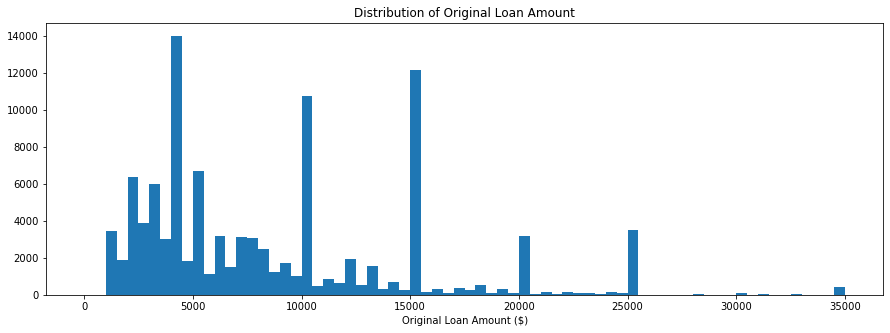

In [9]:
plt.figure(figsize=(15,5))
binsize=500
bins = np.arange(0, loan_data['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data=loan_data, x= 'LoanOriginalAmount',bins=bins)
plt.xlabel('Original Loan Amount ($)')
plt.title('Distribution of Original Loan Amount');

## Loan status vs. original loan amount

The graph shows the humps noted earlier that denote the standard original loan amounts that are common. We can see that they are common for all loan status types but for current, completed and Charged off loans with even more humps, there seems to be more standard original loan amounts associated with them.

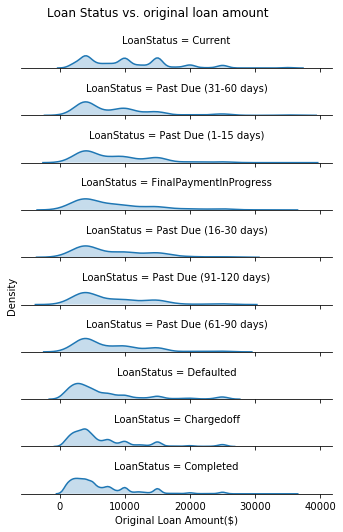

In [19]:
#using kernel density
group_means = loan_data.groupby(['LoanStatus']).mean()
group_order = group_means.sort_values(['LoanOriginalAmount'], ascending = False).index

g = sb.FacetGrid(data = loan_data, row = 'LoanStatus', height = 0.75, aspect = 7, row_order = group_order)
g.map(sb.kdeplot, 'LoanOriginalAmount', shade = True)
g.axes[9,0].set_xlabel('Original Loan Amount($)')
g.axes[5,0].set_ylabel('Density')
g.set(yticks=[])
g.despine(left=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Status vs. original loan amount');

## Loan status vs. monthly loan payment
There exists quite a few outliers. The completed category has the highest large value outliers and this makes intuitive sense because more loans can be completed if much higher payments than normal are being made to them. The final payment in progress category has the longest box and whisker showing that a larger range of monthly payments exist for majority of the customers undergoing their last payment. Median values for current loans are highest.

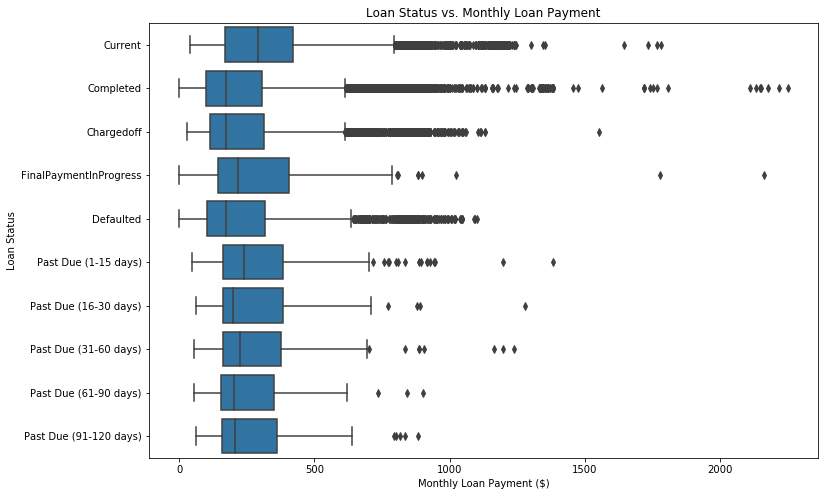

In [11]:
plt.figure(figsize = [12, 8])
sb.boxplot(data = loan_data, y = 'LoanStatus', x = 'MonthlyLoanPayment', color = base_color)
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('Loan Status')
plt.title('Loan Status vs. Monthly Loan Payment');

## Loan status vs. interest rate
Past due and charged off loans have the highest average interest rates. This may be a reason for the loans being harder to pay off or taking longer to. Alternatively, current and completed loans have the lowest average interest rates.

The longer error bars plotted show that past due loans have higher uncertainties in the mean than the shorter error bars associated with current, completed and charged off loans that have lower error bars.

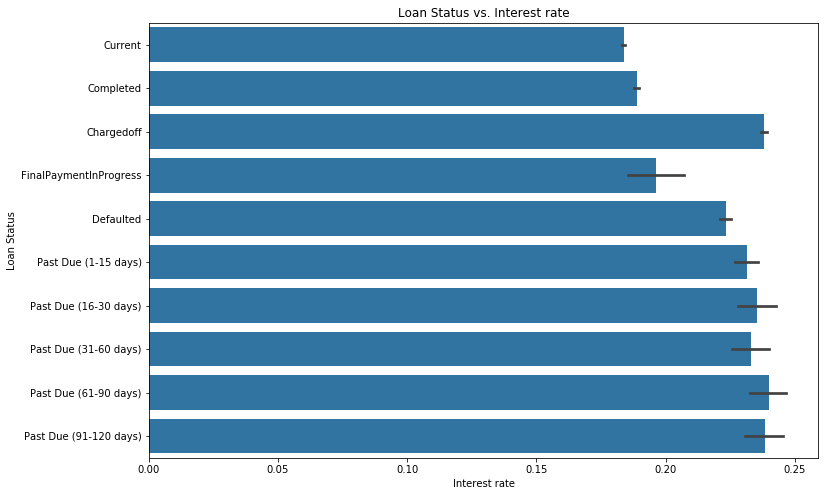

In [12]:
plt.figure(figsize = [12, 8])
sb.barplot(data = loan_data, y = 'LoanStatus', x = 'BorrowerRate', color = base_color)
plt.xlabel('Interest rate')
plt.ylabel('Loan Status')
plt.title('Loan Status vs. Interest rate');

## Loan status vs. Monthly loan payment vs. original loan amount
The previous positive relationship between monthly payment and original amount can be seen here. We can also see that for completed loans denoted by the orange dots, the relationship between original loan amount and monthly loan payment has a much steeper slope meaning that for the same original loan amount, completed loan status clients paid more towards the loan than the other loan status customers.

I would have expected to see a much steeper line for current loans, denoted by the dark blue color but it seems like the purple default status is steeper than it, implying that althought default loans pay more they are still defaulting compared to current clients that are paying less but have not defaulted for similar original loan amount.

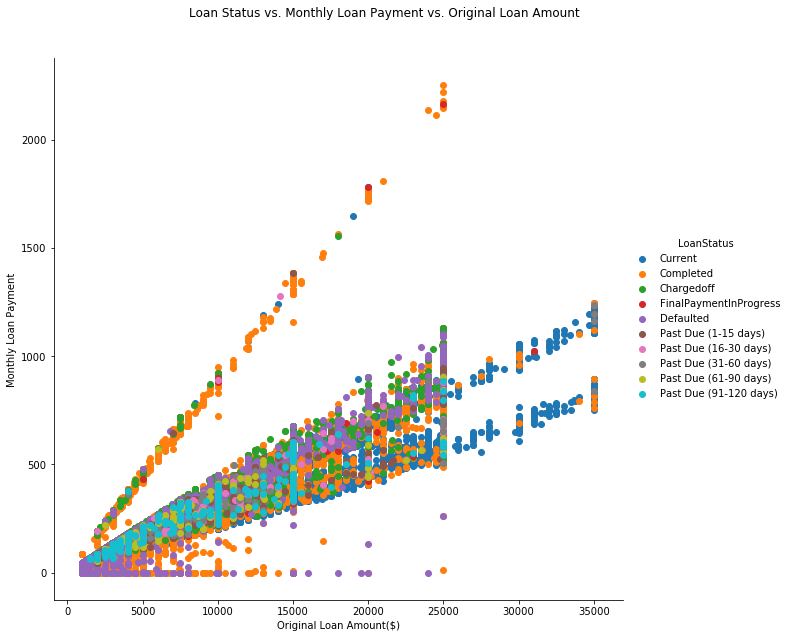

In [13]:
g = sb.FacetGrid(data = loan_data, hue = 'LoanStatus', height = 9)
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend()
g.set_xlabels('Original Loan Amount($)')
g.set_ylabels('Monthly Loan Payment')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Status vs. Monthly Loan Payment vs. Original Loan Amount');

## Loan status vs. Interest rate vs. original loan amount
The negative relationship between interest rate and average original loan amount is negative for all loan status categories.

Completed, Charged off and defaulted loans have interest rates that are higher than 0.33 with the other loan status categories not going beyond 0.33. These three also have less steep slopes which means that the lower the original loan amounts are, the less rate at which the interest rate increases compared to the rest of the categories.

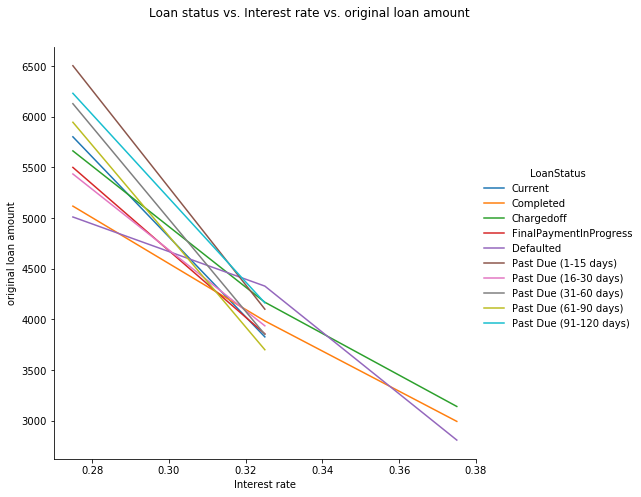

In [14]:
#create function for frequency polygons for levels of loan status
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, loan_data['BorrowerRate'].max()+0.05, 0.05)
g = sb.FacetGrid(data = loan_data, hue = 'LoanStatus', height = 7)
g.map(mean_poly, "BorrowerRate", "LoanOriginalAmount", bins = bin_edges)
g.set_ylabels('original loan amount')
g.add_legend();
g.set_xlabels('Interest rate')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Loan status vs. Interest rate vs. original loan amount');